<a href="https://colab.research.google.com/github/JohnnyPeng123/Bag-of-word-public/blob/master/Lab05%20-%20Johnny's%20Answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 05

# Preprocessing

Text preprocessing is traditionally an important step for natural language processing (NLP) tasks. It transforms text into a more digestible form so that machine learning algorithms can perform better.

## Text Wrangling

Text wrangling is a converting/gathering/extracting formatted text from the raw data. 

For example, **HTML** does not include only text. Even you extract only the text from **HTML**, they are not all meaningful (i.e. advertisements).

Have a look at the [news article](https://www.smh.com.au/national/nsw/macquarie-uni-suspends-teaching-for-10-days-to-move-learning-online-20200317-p54avs.html). We might be only interested in getting headline and main contents of the article.

The following code removes some irrelevant tags (i.e. script, style, link, etc.) and displays the remained tags. ()
    


In [1]:
import urllib
from bs4 import BeautifulSoup

url = "https://www.smh.com.au/national/nsw/macquarie-uni-suspends-teaching-for-10-days-to-move-learning-online-20200317-p54avs.html"
html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(html)

# remove not relevant tags (script, style, link, etc.)
for script in soup(["script", "style", "link", "head", "noscript"]):
    script.extract()    # rip it out

# get text
text = soup.get_text()

print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <body data-pb-config="{}">
  <div id="app">
   <div>
    <div>
     <div aria-atomic="true" aria-live="off" class="_2O3rv" id="page_announcer" tabindex="-1">
      University of Sydney to move fully online while Macquarie cancels classes
     </div>
     <div>
     </div>
     <nav class="RbLp5">
      <a href="#sections">
       Skip to sections navigation
      </a>
      <a href="#content">
       Skip to content
      </a>
      <a href="#footer">
       Skip to footer
      </a>
     </nav>
     <header class="_21UZG noPrint">
      <div class="_2L98J">
       <ul>
        <li class="PJUwX">
         <a aria-controls="navigation" aria-expanded="false" href="javascript:void(0);">
          Our network
         </a>
        </li>
        <li class="_3CYE0">
         <div class="_3LlBk">
          <a class="_2dAsA" href="https://subscribe.smh.com.au/?promote_channel=HI_SMH_GNL_HL">
           Subscribe
          </a>
          <button class="_3S9ou" 

**Try &lt;p&gt;  tag**

Using &lt;p&gt;  tag is a common way to extract the main contents of the online news articles. BUT, do not expect this always provides what you want.

In [2]:
p_tags = soup.findAll('p',text=True)
for i, p_tag in enumerate(p_tags): 
    print(str(i) + str(p_tag))

0<p>The University of Sydney will suspend all face-to-face teaching from Monday and move fully online while Macquarie University has cancelled classes altogether in order to make the digital transition, revealing one of its students tested positive for COVID-19.</p>
1<p>The University of Sydney's 10,000 staff members have been encouraged to work remotely to slow the spread of coronavirus, but the campus Wi-Fi network and facilities will remain open with enhanced cleaning protocols and social distancing measures.</p>
2<p>Courses with labs and practical components will be adapted for online or suspended until later in the semester while clinical placements for health students will go ahead under strict guidelines, Vice-Chancellor Michael Spence wrote to staff on Tuesday afternoon.</p>
3<p>"We’ve put a lot of effort and thought into how to do it. I think this is a tremendous opportunity. This could be an interesting pedagogical experiment," he said.</p>
4<p>"At the moment we have to spend

## Punctuations removal

First, let's try to remove by using the list of punctuations! 

In [3]:
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def remove_punctuation(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, '')
    return x


text = "It's a nice day[]"
print(remove_punctuation(text))


Its a nice day


Then, what about the the regular expression ([re package](https://docs.python.org/3/library/re.html))?

In [4]:
import re

def remove_punctuation_re(x):
    x = re.sub(r'[^\w\s]','',x)
    
    return x


text = "It's a nice day[]"

print(remove_punctuation_re(text))

Its a nice day


Ok. Then what about emoticons?      **:)** or **:D** or **:(**


In [0]:
#you can find the solution from the TweetTokenizer https://www.nltk.org/_modules/nltk/tokenize/casual.html#TweetTokenizer
EMOTICONS = r"""
    (?:
      [<>]?
      [:;=8]                     # eyes
      [\-o\*\']?                 # optional nose
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      |
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      [\-o\*\']?                 # optional nose
      [:;=8]                     # eyes
      [<>]?
      |
      <3                         # heart
    )"""

Have a look at some contractions of words!


In [0]:
# These are just common English contractions. There are many edge cases. i.e. University's working on it.
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                    "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                    "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                    "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", 
                    "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", 
                    "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
                    "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", 
                    "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                    "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
                    "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                    "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                    "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                    "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", 
                    "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", 
                    "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                    "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", 
                    "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
                    "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", 
                    "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                    "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

## Stopwords removal
Stopwords are the most common words in any natural language. For the purpose of analyzing text data and building NLP models, these stopwords might not add much value to the meaning of the document. Generally, the most common words used in a text are “the”, “is”, “in”, “for”, “where”, “when”, “to”, “at” etc.



In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords as sw
from nltk.tokenize import word_tokenize

my_sent = "Natural Language Processing is fun but challenging."
tokens = word_tokenize(my_sent)

stop_words = sw.words()
filtered_sentence = [w for w in tokens if not w in stop_words]

print(filtered_sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['Natural', 'Language', 'Processing', 'fun', 'challenging', '.']


## Case-folding
A common strategy is to do case-folding by reducing all letters to lower case

In [8]:
text = "Hello there!"
#Returns the result of converting all characters in text to lowercase.
print(text.lower())


#do we need to reduce all letters to lower case?
text2 = "I love University of Sydney :D"
print(text2.lower())

hello there!
i love university of sydney :d


## Stemming
Stemming is a process of removing and replacing word suffixes to arrive at a common root form of the word.

*   Try various types of NLTK stemmer in [demo](http://text-processing.com/demo/stem/)
*   A comparative study of stemming algorithm: [Paper Link](https://pdfs.semanticscholar.org/1c0c/0fa35d4ff8a2f925eb955e48d655494bd167.pdf)


In [9]:
#let's try to test with porter algorithm
from nltk.stem.porter import *
stemmer = PorterStemmer()

plurals = ['caresses', 'flies', 'dies', 'mules', 'denied',
            'died', 'agreed', 'owned', 'humbled', 'sized',
            'meeting', 'stating', 'siezing', 'itemization',
            'sensational', 'traditional', 'reference', 'colonizer',
            'plotted']
singles = [stemmer.stem(plural) for plural in plurals]

print(singles)

['caress', 'fli', 'die', 'mule', 'deni', 'die', 'agre', 'own', 'humbl', 'size', 'meet', 'state', 'siez', 'item', 'sensat', 'tradit', 'refer', 'colon', 'plot']


## Lemmatisation

Lemmatisation is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form


In [10]:
#by NLTK Wordnet
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))
print(lemmatizer.lemmatize("python"))
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("best", pos="a"))
print(lemmatizer.lemmatize("run"))
print(lemmatizer.lemmatize("run",'v'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
cat
cactus
goose
rock
python
good
best
run
run


## Tokenisation

Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called tokens , perhaps at the same time throwing away certain characters, such as punctuation

Try various types of NLTK Tokenizer in [demo](http://text-processing.com/demo/tokenize/). 

[NLTK Tokeniser API Doc](https://www.nltk.org/api/nltk.tokenize.html)

**TweetTokenizer: Twitter-aware tokeniser**

In [11]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

s0 = "I am so happy :) ;)" 

print(tknzr.tokenize(s0))

s0 = "I am so sad :("

print(tknzr.tokenize(s0))

['I', 'am', 'so', 'happy', ':)', ';)']
['I', 'am', 'so', 'sad', ':(']


**TreebankWordTokenizer**

The Treebank tokenizer uses regular expressions to tokenize text as in Penn Treebank.

In [12]:
from nltk.tokenize import TreebankWordTokenizer
tknzr = TreebankWordTokenizer()

s0 = "I am so happy :) ;)" 

print(tknzr.tokenize(s0))

s0 = "I am so sad :("

print(tknzr.tokenize(s0))

['I', 'am', 'so', 'happy', ':', ')', ';', ')']
['I', 'am', 'so', 'sad', ':', '(']


# Word Cloud
*   [Word Cloud](https://amueller.github.io/word_cloud/index.html)
*   [Wikipedia Python](https://pypi.org/project/wikipedia/)


In [13]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=ca6bc167585156cba8d393ccc3183bed920985d32c2bb8328c584a517fb65a19
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


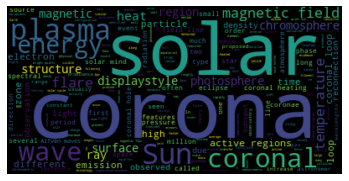

In [14]:
from wordcloud import WordCloud
import wikipedia

# Getting wikipedia contents of "University of Sydney"
text = wikipedia.page("Corona").content

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Try more word cloud examples: [Link](https://amueller.github.io/word_cloud/auto_examples/index.html)

# Saving and Loading Models

**Saving model**

In [15]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class TheModelClass(nn.Module):
    def __init__(self):
        super(TheModelClass, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, input):
        output = self.linear(input)
        return output

no_of_epochs = 500
display_interval = 20
learning_rate=0.01

# training data
x_training = np.asarray([[1],[2],[5],[8],[9],[12],[14],[16],[18],[20]])
y_training = np.asarray([100,200,501,780,901,1201,1399,1598,1800,2000])

x_data_torch = torch.from_numpy(x_training).float()
y_data_torch = torch.from_numpy(y_training).float() 

model = TheModelClass()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(no_of_epochs):

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = model(x_data_torch)
    loss = torch.sum(torch.pow(outputs-y_data_torch.view(-1,1),2))/(2*x_training.shape[0])
    loss.backward()
    optimizer.step()

    if epoch%display_interval == display_interval-1:
        print('Epoch: %d, loss: %.3f' %(epoch + 1, loss.item() ))

Epoch: 20, loss: 29.435
Epoch: 40, loss: 28.327
Epoch: 60, loss: 27.329
Epoch: 80, loss: 26.431
Epoch: 100, loss: 25.622
Epoch: 120, loss: 24.893
Epoch: 140, loss: 24.236
Epoch: 160, loss: 23.645
Epoch: 180, loss: 23.113
Epoch: 200, loss: 22.633
Epoch: 220, loss: 22.201
Epoch: 240, loss: 21.812
Epoch: 260, loss: 21.462
Epoch: 280, loss: 21.146
Epoch: 300, loss: 20.862
Epoch: 320, loss: 20.606
Epoch: 340, loss: 20.375
Epoch: 360, loss: 20.168
Epoch: 380, loss: 19.981
Epoch: 400, loss: 19.812
Epoch: 420, loss: 19.661
Epoch: 440, loss: 19.524
Epoch: 460, loss: 19.401
Epoch: 480, loss: 19.290
Epoch: 500, loss: 19.190


In [16]:
torch.save(model, 'filename.pt')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type TheModelClass. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


**Loading model**

In [17]:
the_saved_model = torch.load('filename.pt')
the_saved_model.eval()

TheModelClass(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [18]:
prediction = the_saved_model(x_data_torch).detach().numpy()
for i in range(len(y_training)):
    print('X: %d, Y_true: %d, Y_predict: %.3f'%(x_training[i][0],y_training[i],prediction[i][0]))

X: 1, Y_true: 100, Y_predict: 99.708
X: 2, Y_true: 200, Y_predict: 199.600
X: 5, Y_true: 501, Y_predict: 499.277
X: 8, Y_true: 780, Y_predict: 798.954
X: 9, Y_true: 901, Y_predict: 898.846
X: 12, Y_true: 1201, Y_predict: 1198.522
X: 14, Y_true: 1399, Y_predict: 1398.307
X: 16, Y_true: 1598, Y_predict: 1598.091
X: 18, Y_true: 1800, Y_predict: 1797.876
X: 20, Y_true: 2000, Y_predict: 1997.660


**How to Save (Upload) the model to your Google Drive**

There are various ways to upload the files on Google Drive.

[This tutorial](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH) will guide you how to save the files on your Google Drive.

1.   Mounting Google Drive locally
2.   Create a new Drive file


# Bi-LSTM with Hidden State Extraction

The folllowing image represents the Bi-LSTM for N to 1 task. In the N to 1 task, it usually requires to extract the last hidden states of forward lstm and backward lstm and combine (concat) them. (Please check the lecture 5 recording, please!)

![alt text](https://usydnlpgroup.files.wordpress.com/2020/03/bi-lstm_nto1-e1585416735686.png)

Bi-LSTM: Bidirectional LSTM, which means the signal propagates backward as well as forward in time.

We are going to apply the same toy data we used in the lab 4.

In [0]:
import torch
#You can enable GPU here (cuda); or just CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import numpy as np

#Assume that we have the following character instances
char_arr = ['a', 'b', 'c', 'd', 'e', 'f', 'g',
            'h', 'i', 'j', 'k', 'l', 'm', 'n',

            'o', 'p', 'q', 'r', 's', 't', 'u',
            'v', 'w', 'x', 'y', 'z']

# one-hot encoding and decoding 
# {'a': 0, 'b': 1, 'c': 2, ..., 'j': 9, 'k', 10, ...}
num_dic = {n: i for i, n in enumerate(char_arr)}
dic_len = len(num_dic)


# a list words for sequence data (input and output)
seq_data = ['word', 'wood', 'deep', 'dive', 'cold', 'cool', 'load', 'love', 'kiss', 'kind']

# Make a batch to have sequence data for input and ouput
# wor -> X, d -> Y
# dee -> X, p -> Y
def make_batch(seq_data):
    input_batch = []
    target_batch = []
    
    for seq in seq_data:
        # input data is:
        #     wor           woo        dee       div
        # [22, 14, 17] [22, 14, 14] [3, 4, 4] [3, 8, 21] ...
        
        input_data = [num_dic[n] for n in seq[:-1]]
        
        # target is :
        # d, d, p, e, ...
        # 3, 3, 15, 4, ...
        target = num_dic[seq[-1]]
        
        # convert input to one-hot encoding.
        # if input is [3, 4, 4]:
        # [[ 0,  0,  0,  1,  0,  0,  0, ... 0]
        #  [ 0,  0,  0,  0,  1,  0,  0, ... 0]
        #  [ 0,  0,  0,  0,  1,  0,  0, ... 0]]
        input_batch.append(np.eye(dic_len)[input_data])
        
        target_batch.append([target])

    return input_batch, target_batch

### Setting hyperparameters

learning_rate = 0.1
n_hidden = 128
total_epoch = 50

# Number of sequences for RNN
n_step = 3

# number of inputs (dimension of input vector) = 26
n_input = dic_len
# number of classes = 26
n_class = dic_len


In [21]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.lstm = nn.LSTM(n_input, n_hidden, batch_first =True,bidirectional=True, dropout=0.2)
        self.linear = nn.Linear(n_hidden*2,n_class)

    def forward(self, sentence):
        
        #h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        lstm_out, (h_n,c_n) = self.lstm(sentence)
        #concat the last hidden state from two direction
        hidden_out =torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        log_output = F.log_softmax(z, dim=1)
        return log_output,hidden_out

# Move the model to GPU
net = Net().to(device)
# Loss function and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

# Preparing input
input_batch, target_batch = make_batch(seq_data)
# Convert input into tensors and move them to GPU by uting tensor.to(device)
input_batch_torch = torch.from_numpy(np.array(input_batch)).float().to(device)
target_batch_torch = torch.from_numpy(np.array(target_batch)).view(-1).to(device)


for epoch in range(total_epoch):  
    
    # Set the flag to training
    net.train()
    
    # forward + backward + optimize
    outputs,_ = net(input_batch_torch) 
    loss = criterion(outputs, target_batch_torch)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # Set the flag to evaluation, which will 'turn off' the dropout
    net.eval()
    outputs,_ = net(input_batch_torch) 
    
    # Evaluation loss and accuracy calculation
    loss = criterion(outputs, target_batch_torch)
    _, predicted = torch.max(outputs, 1)
    acc= accuracy_score(predicted.cpu().numpy(),target_batch_torch.cpu().numpy())

    print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))

print('Finished Training')

## Prediction
predict_words = []
for i in range(len(predicted.cpu().numpy())):
    ind = predicted.cpu().numpy()[i]
    predict_words.append(seq_data[i][:-1]+char_arr[ind])

print('\n=== Prediction Result ===')
print('Input:', [w[:3] + ' ' for w in seq_data])
print('Predicted:', predict_words)
print('Accuracy: %.2f' %acc)


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Epoch: 1, loss: 1.68502, train_acc: 0.50
Epoch: 2, loss: 2.16859, train_acc: 0.20
Epoch: 3, loss: 4.66985, train_acc: 0.30
Epoch: 4, loss: 2.59931, train_acc: 0.50
Epoch: 5, loss: 5.80417, train_acc: 0.10
Epoch: 6, loss: 2.09955, train_acc: 0.20
Epoch: 7, loss: 1.44174, train_acc: 0.50
Epoch: 8, loss: 0.86425, train_acc: 0.70
Epoch: 9, loss: 0.82422, train_acc: 0.90
Epoch: 10, loss: 0.25646, train_acc: 0.80
Epoch: 11, loss: 0.13556, train_acc: 1.00
Epoch: 12, loss: 0.09892, train_acc: 0.90
Epoch: 13, loss: 0.03932, train_acc: 1.00
Epoch: 14, loss: 0.03229, train_acc: 1.00
Epoch: 15, loss: 0.02715, train_acc: 1.00
Epoch: 16, loss: 0.01112, train_acc: 1.00
Epoch: 17, loss: 0.00446, train_acc: 1.00
Epoch: 18, loss: 0.00311, train_acc: 1.00
Epoch: 19, loss: 0.00293, train_acc: 1.00
Epoch: 20, loss: 0.00275, train_acc: 1.00
Epoch: 21, loss: 0.00238, train_acc: 1.00
Epoch: 22, loss: 0.00191, train_acc: 1.00
Epoch: 23, loss: 0.00145, train_acc: 1.00
Epoch: 24, loss: 0.00117, train_acc: 1.00
E

**How to extract the concatenated hidden state**

In [22]:
net.eval()
_,hidden_state = net(input_batch_torch)
print(n_hidden)
print(len(seq_data)) 
print(hidden_state.size())
print(hidden_state.data)

128
10
torch.Size([10, 256])
tensor([[ 1.3332e-06, -7.5658e-01,  1.0926e-07,  ...,  7.0121e-13,
         -5.0437e-06, -7.6311e-01],
        [ 3.6162e-06, -7.5658e-01,  1.3732e-07,  ...,  1.6962e-03,
         -1.4431e-04, -3.3467e-01],
        [ 1.3364e-03, -6.4163e-08, -7.4295e-01,  ..., -4.1531e-01,
          1.1383e-02, -6.6188e-02],
        ...,
        [ 4.0414e-06, -2.0580e-02, -3.6173e-05,  ...,  1.1757e-04,
         -1.8349e-07, -6.2295e-01],
        [ 1.8073e-03, -1.0287e-05, -3.6084e-01,  ..., -1.1835e-01,
          3.8682e-03, -4.2502e-01],
        [ 9.5253e-03, -2.3210e-04, -3.2801e-01,  ...,  1.0507e-11,
         -2.1003e-05, -7.6113e-01]], device='cuda:0')


# Exercise
In this exercise, you are to preprocess the train and test data, and apply different pre-trained embeddings.

**Note**: We won't mark your exercise based on the test set performance, we will only check whether the preprocessing part and embedding part are correct.

**Important**: This exercise is very important to your assignment1 since you can use most of the codes here in your assignment1.


In [0]:
import torch
#You can enable GPU here (cuda); or just CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Download Dataset

In [0]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1gNfBqguzBu8cHKMPc8C44GbvD443dNC5'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('twitter.csv')  

import pandas as pd
df = pd.read_csv("twitter.csv")
df_pick = df.sample(40,random_state=24)

raw_text = df_pick["Text"].tolist()
raw_label = df_pick["Label"].tolist()

from sklearn.model_selection import train_test_split
text_train,text_test,label_train,label_test = train_test_split(raw_text,raw_label,test_size=0.25,random_state=42)

## Preprocessing [Complete this section]

**Case Folding**

In [0]:
text_train = [s.lower() for s in text_train]
text_test = [s.lower() for s in text_test]

**Remove punctuations [Please complete this section]**

In [0]:
import re
def remove_punctuation_re(x):
    x = re.sub(r'[^\w\s]','',x)
    return x
    
text_train = [remove_punctuation_re(s) for s in text_train]
text_test = [remove_punctuation_re(s) for s in text_test]

**Tokenization [Please complete this section]**

In [35]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

#Please complete this
text_train = [word_tokenize(s) for s in text_train]
text_test = [word_tokenize(s) for s in text_test]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Remove stopwords [Please complete this section]**

In [36]:
nltk.download('stopwords')
from nltk.corpus import stopwords as sw
stop_words = sw.words()

text_train_ns=[]
for tokens in text_train:
    filtered_sentence = [w for w in tokens if not w in stop_words]
    text_train_ns.append(filtered_sentence)

text_test_ns=[]
for tokens in text_test:
    filtered_sentence = [w for w in tokens if not w in stop_words]
    text_test_ns.append(filtered_sentence)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Lemmatisation [Please complete this section]**

In [37]:
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

text_train_le = []
for tokens in text_train_ns:
    lemma_sentence = [lemmatizer.lemmatize(w) for w in tokens ]
    text_train_le.append(lemma_sentence)

text_test_le = []
for tokens in text_test_ns:
    lemma_sentence = [lemmatizer.lemmatize(w) for w in tokens ]
    text_test_le.append(lemma_sentence)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Label Encoding**

In [38]:
from sklearn.preprocessing import LabelEncoder

labels = np.unique(label_train)

lEnc = LabelEncoder()
lEnc.fit(labels)
label_train_n = lEnc.transform(label_train)
label_test_n = lEnc.transform(label_test)
numClass = len(labels)

print(labels)
print(lEnc.transform(labels))

['none' 'racism' 'sexism']
[0 1 2]


## Embeddings [Complete this section]

**Padding**

In [0]:
len_list = [len(s) for s in text_train_ns]
seq_length = max(len_list)

def add_padding(corpus, seq_length):
    output = []
    for sentence in corpus:
        if len(sentence)>seq_length:
            output.append(sentence[:seq_length])
        else:
            for j in range(seq_length-len(sentence)):
                sentence.append("<PAD>")
            output.append(sentence)
    return output

text_train_pad = add_padding(text_train_le,seq_length )
text_test_pad = add_padding(text_test_le,seq_length )

**Download Embeddings [Please try other embeddings]**

You can find the details from https://github.com/RaRe-Technologies/gensim-data

In [40]:
import gensim.downloader as api
word_emb_model = api.load("glove-twitter-25") #this is only example

[==================================================] 100.0% 104.8/104.8MB downloaded


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


**Get embeddings**

In [41]:
def get_embeddings(corpus,word_emb_model):
    emb_dim = word_emb_model.vector_size
    out = []
    for sentence in corpus:
        out_temp = []
        for word in sentence:
            try:
                out_temp.append(word_emb_model.wv[word])
            except:
                out_temp.append([0]*emb_dim)
    
        out.append(out_temp)
    return np.array(out)

train_emb = get_embeddings(text_train_pad,word_emb_model)
test_emb = get_embeddings(text_test_pad,word_emb_model)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


## Model

In [0]:
n_input = train_emb.shape[2]
n_hidden = 50
n_class = len(labels)
total_epoch = 100
learning_rate = 0.01

In [43]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.lstm = nn.LSTM(n_input, n_hidden, num_layers=2, batch_first =True, dropout=0.2)
        self.linear = nn.Linear(n_hidden,n_class)

    def forward(self, x):
        x,_ = self.lstm(x)
        x = self.linear(x[:,-1,:])
        x = F.log_softmax(x, dim=1)
        return x


net = Net().to(device)
criterion = nn.NLLLoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

input_batch_torch = torch.from_numpy(np.array(train_emb)).float().to(device)
target_batch_torch = torch.from_numpy(np.array(label_train_n)).view(-1).to(device)


for epoch in range(total_epoch):  
    
    net.train()
    outputs = net(input_batch_torch) 
    loss = criterion(outputs, target_batch_torch)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    net.eval()
    outputs = net(input_batch_torch) 
    
    if epoch%10 == 9:
        loss = criterion(outputs, target_batch_torch)
        _, predicted = torch.max(outputs, 1)
        acc= accuracy_score(predicted.cpu().numpy(),target_batch_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))

print('Finished Training')


ERROR! Session/line number was not unique in database. History logging moved to new session 59
Epoch: 10, loss: 0.53801, train_acc: 0.73
Epoch: 20, loss: 0.25101, train_acc: 0.87
Epoch: 30, loss: 0.00583, train_acc: 1.00
Epoch: 40, loss: 0.00143, train_acc: 1.00
Epoch: 50, loss: 0.39852, train_acc: 0.93
Epoch: 60, loss: 0.42728, train_acc: 0.87
Epoch: 70, loss: 0.19730, train_acc: 0.93
Epoch: 80, loss: 0.12919, train_acc: 0.97
Epoch: 90, loss: 0.10252, train_acc: 0.97
Epoch: 100, loss: 0.05393, train_acc: 0.97
Finished Training


## Save and Load the model [Complete this section]

**Save the model [Complete this part]**

In [44]:
torch.save(net, 'lab5.pt')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


**Load the model**

In [45]:
model2 = torch.load('lab5.pt')
model2.eval()

Net(
  (lstm): LSTM(25, 50, num_layers=2, batch_first=True, dropout=0.2)
  (linear): Linear(in_features=50, out_features=3, bias=True)
)

## Testing

In [46]:
input_batch_torch = torch.from_numpy(np.array(test_emb)).float().to(device)

outputs = model2(input_batch_torch) 
_, predicted = torch.max(outputs, 1)

from sklearn.metrics import classification_report
print(classification_report(label_test_n,predicted.cpu().numpy()))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         1

    accuracy                           0.80        10
   macro avg       0.62      0.62      0.62        10
weighted avg       0.80      0.80      0.80        10

